Lemonade_Inc_tweets.csv
('Number of urls:', 726)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
HTTPSConnectionPool(host='www.interbrand.com', port=443): Read timed out. (read timeout=10)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape this", 406)
("You can't scrape this", 404)
("You can't scrape this", 404)
("You can't scrape thi

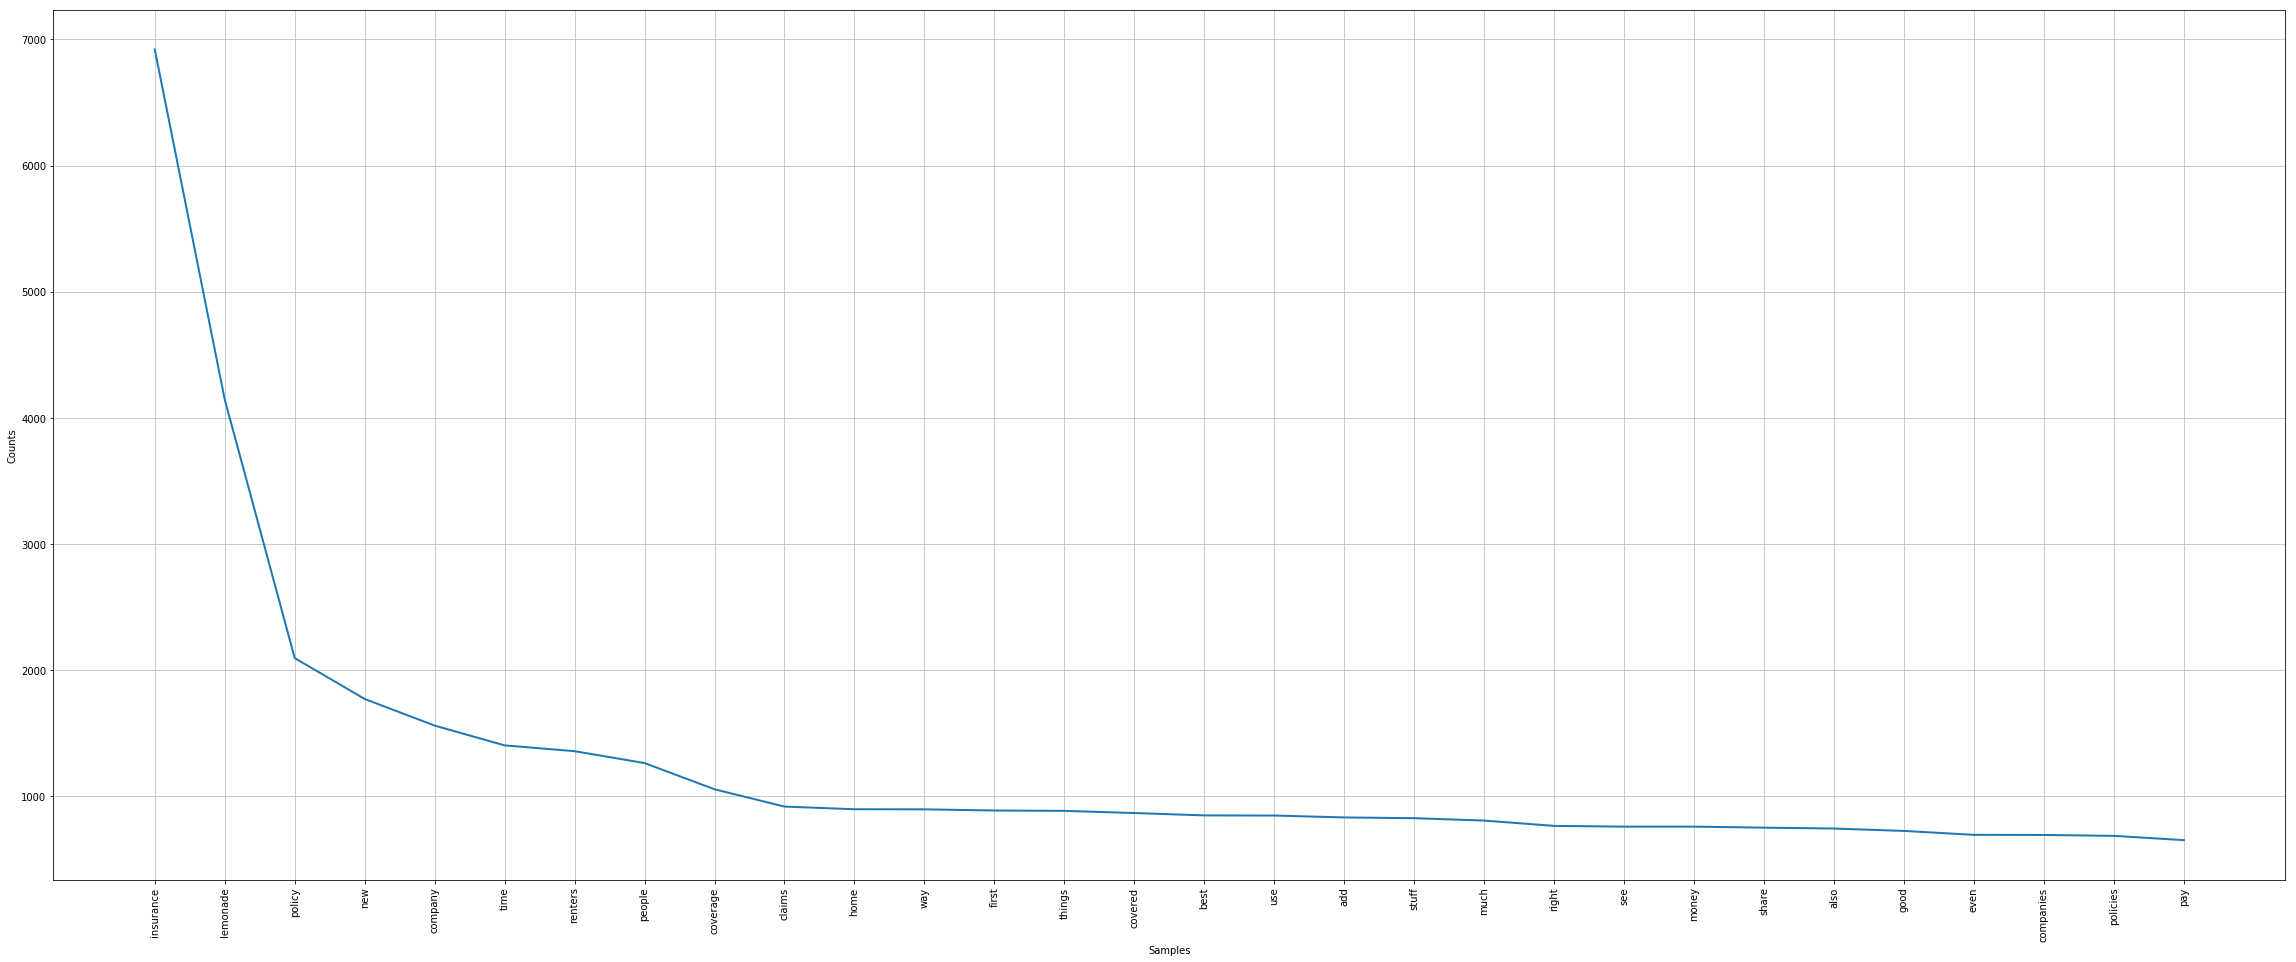

<FreqDist with 12395 samples and 268515 outcomes>


In [215]:
#configure number of words in results
words_num = 30 # number of words to show in frequency figure
word_num_csv = 200 #number of words to save in frequency csv file

import tweepy
import csv
import pandas
#import nltk
#nltk.download()
from nltk import word_tokenize

#Twitter API credentials
import configparser
tw = configparser.ConfigParser()
tw.read("twitter.conf")
consumer_key = tw.get("develop", "API_KEY")
consumer_secret = tw.get("develop", "API_SECRET_KEY")
access_key = tw.get("develop", "ACCESS_TOCKER")
access_secret = tw.get("develop", "ACCESS_TOCKER_SECRET")



def get_all_tweets(screen_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200, include_entities = True, tweet_mode='extended')
    
    #save most recent tweets
    alltweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    oldest = alltweets[-1].id - 1
    
    #keep grabbing tweets until there are no tweets left to grab
    while len(new_tweets) > 0:
        #print "getting tweets before %s" % (oldest)
    
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest, include_entities = True, tweet_mode='extended')
        
        #save most recent tweets
        alltweets.extend(new_tweets)

        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1

    #transform the tweepy tweets into a 2D array that will populate the csv	
    outtweets = [[tweet.id_str, tweet.created_at, tweet.full_text.encode('utf-8'), \
                  tweet.retweet_count, tweet.favorite_count, \
                  tweet.entities['urls'][0]['expanded_url'] if len(tweet.entities['urls']) > 0 else ""] for tweet in alltweets]

    #write the csv
    with open('%s_tweets.csv' % screen_name, 'w') as f:
        writer = csv.writer(f)
        writer.writerow(["id","created_at","text", "retweet", "favorite", "url"])
        writer.writerows(outtweets)
        
    pass

import re
def remove_url(txt):
    txt = " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    txt = txt.replace("\n", "")
    return txt.lower()

def get_words_frequency(texts, filename):
    #remove url
    texts = remove_url(texts)
    #get word token      
    texts_token = word_tokenize(texts)
    #remove common words
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    stop_words = add_stop_words(stop_words)   
    filtered_sentence = [w for w in texts_token if not w in stop_words]   
    filtered_sentence = []   
    for w in texts_token: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    #write frequency to csv
    fd = graph(filtered_sentence)
    file = csv.writer(open(filename, 'wb'))
    for key, count in fd.most_common(word_num_csv):
        file.writerow([key, count])
        
#plot frequency    
def graph(tokens):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(40, 16))
    fd = nltk.FreqDist(tokens)
    fd.plot(words_num,cumulative=False)
    print(fd)
    return fd
    

def add_stop_words(s):
    s.add(u'thank')
    s.add(u'thanks') 
    s.add(u'us')
    s.add(u'looking')
    s.add(u'make')
    s.add(u'get')
    s.add(u'like')
    s.add(u'need')
    s.add(u'take')
    s.add(u'thats')
    s.add(u'one')
    s.add(u'read')
    s.add(u'hey')
    s.add(u'glad')
    s.add(u'check')
    s.add(u'dont')
    s.add(u'part')
    s.add(u'well')
    s.add(u'love')
    s.add(u'big')
    s.add(u'help')
    s.add(u'hear')
    s.add(u'year')
    s.add(u'happy')
    s.add(u'know')
    s.add(u'week')
    s.add(u'day')
    s.add(u'wand')
    s.add(u'assaf')
    s.add(u'heres')
    
    s.add(u'let')
    s.add(u'think')
    s.add(u'com')
    s.add(u'go')
    s.add(u'back')
    s.add(u'yay')

    s.add(u'true')
    s.add(u'said')
    s.add(u'tweet')
    s.add(u'twitter')
    s.add(u'follow')
    s.add(u'sign')
    s.add(u'blog')
    s.add(u'list')
    s.add(u'color')
    s.add(u'page')
    s.add(u'type')
    s.add(u'link')
    s.add(u'hover')
    s.add(u'may')
    s.add(u'dropdown')
    s.add(u'document')
    s.add(u'documents')
    s.add(u'border')
    s.add(u'data')
    s.add(u'https')
    s.add(u'icon')
    s.add(u'button')
    s.add(u'menu')
    s.add(u'copyright')
    s.add(u'would')
    s.add(u'click')
    return s

def clean_up_texts(texts):
    from nltk.corpus import words
    texts = re.sub("[^a-zA-Z]+", " ", texts)
    texts = ' '.join( [w for w in texts.split() if len(w)>2 and len(w) < 10] )
    texts = texts.lower()
    return texts

def get_web_page_text(my_url):
    import requests
    from bs4 import BeautifulSoup
    try:
        from urllib.parse import urlparse
    except ImportError:
        from urlparse import urlparse
    print("Grabbing...", my_url)
    domain = urlparse(my_url).netloc # domain name
    try:
        response = requests.get(my_url, timeout=10) # go to the url and get it
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        print e
        return " "

    if response.status_code != 200: # not equal, == equal
        print("You can't scrape this", response.status_code)
        return " "
    else:
        html = response.text
        soup = BeautifulSoup(html, "html.parser")
        if domain in saved_domains:
            div_class = saved_domains[domain]
            body_ = soup.find("div", {"class": div_class})
        else:
            body_ = soup.find("body")
        if body_ is None:
            return " "
        texts = body_.text
        texts = ""
        for e in soup.find_all('p'):
            texts = texts + " " + e.get_text()
        texts = clean_up_texts(texts)
        return texts
def analyze_webpage(filename):
    print(filename)
    names = ['url']
    df = pandas.read_csv(filename, names=names, encoding='utf-8')
    df = df.dropna()
    url_set = set()
    for u in df['url']:
        if len(u) > 9 and 'youtube' not in u:
            url_set.add(u)
    print("Number of urls:", len(url_set))
    #convert dataframe to string
    texts = ""
    for u in url_set:
        texts = texts + " " + get_web_page_text(u)
    get_words_frequency(texts, 'webpage_analyze_' + filename)
    
def analyze_twitter(filename):
    #read from csv
    print(filename)
    names = ['id', 'text', 'retweet', 'favorite']
    df = pandas.read_csv(filename, names=names, encoding='utf-8')
    #convert dataframe to string
    texts = ""
    for t in df['text']:
        texts = texts + " " + t
    get_words_frequency(texts, 'twitter_analyze_' + filename)
    
def get_good_language(screen_name):
    #pass in the username of the account you want to download
    get_all_tweets(screen_name)
    filename = screen_name + "_tweets.csv"
    analyze_twitter(filename)
    analyze_webpage(filename)

if __name__ == '__main__':
    get_good_language("hippo_insurance")
    get_good_language("Lemonade_Inc")

